<a href="https://colab.research.google.com/github/kyungmin0101/medical_ai/blob/main/240220/week2_kyungmin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [44]:
!ls

1stSeries_07.05.21  2ndSeries_21.05.21


In [47]:
#approach all of the data
import glob
import csv
import pandas as pd
path = "/content/drive/MyDrive/lecture/medical_ai/*/*/{}*".format('W')
df_list = []
cls_list = []
ri_list = []

for file in glob.glob(path, recursive = True) :
  df = pd.read_csv(file, skiprows=24)

  df_list.append(df)
  ri_list.append(float(file.split('/')[-2]))

  if float(file.split('/')[-2]) < 1.3 :
    cls_list.append('Normal Tissue')

  elif float(file.split('/')[-2]) >= 1.3 and float(file.split('/')[-2]) <= 1.32 :
    cls_list.append('CIN-1')

  elif float(file.split('/')[-2]) >= 1.33 and float(file.split('/')[-2]) <= 1.37 :
    cls_list.append('CIN-2')

  elif float(file.split('/')[-2]) >= 1.38 and float(file.split('/')[-2]) <= 1.39 :
    cls_list.append('CIN-3')

  elif float(file.split('/')[-2]) >= 1.39 :
    cls_list.append('Cervical Cancer')

<Axes: xlabel='1475.0000'>

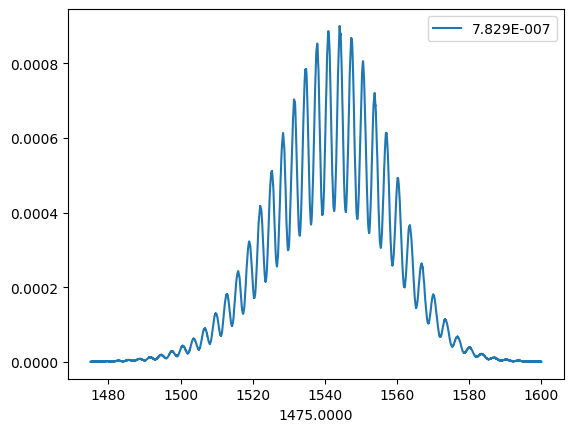

In [48]:
#visualize a single data
df_list[0].astype(float).plot(x=0, y=1)

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import f1_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from sklearn.svm import SVC
import numpy as np
import time

x_cls_train, x_cls_test, y_train, y_test = train_test_split(df_list, cls_list, test_size=0.1)
x_reg_train, x_reg_test, y_reg_train, y_reg_test = train_test_split(df_list, ri_list, test_size=0.1)

nsamples, nx, ny = np.array(x_cls_train).shape
d2_x_train = np.array(x_cls_train).reshape((nsamples,nx*ny))

nsamples, nx, ny = np.array(x_cls_test).shape
d2_x_test = np.array(x_cls_test).reshape((nsamples,nx*ny))


nsamples, nx, ny = np.array(x_reg_train).shape
d2_x_reg_train = np.array(x_reg_train).reshape((nsamples,nx*ny))

nsamples, nx, ny = np.array(x_reg_test).shape
d2_x_reg_test = np.array(x_reg_test).reshape((nsamples,nx*ny))


In [73]:
dec_cls_model = DecisionTreeClassifier(random_state = 0)
rand_cls_model = RandomForestClassifier(max_depth=2, random_state=0)
adb_cls_model = AdaBoostClassifier(n_estimators=100, algorithm="SAMME", random_state=0)
light_gbm_cls_model = LGBMClassifier(learning_rate=0.1, n_estimators=100)
knn_cls_model = KNeighborsClassifier(n_neighbors = 3)
svm = make_pipeline(StandardScaler(), SVC(gamma='auto'))

dec_reg_model = DecisionTreeRegressor(random_state=0)
rand_reg_model = RandomForestRegressor(max_depth=2, random_state=0)
adb_reg_model = AdaBoostRegressor(random_state=0, n_estimators=100)
light_gbm_reg_model = LGBMRegressor( max_depth=2, learning_rate=0.1, n_estimators=100)


In [75]:
start_svm = time.time()
svm.fit(d2_x_train, y_train)
end_svm = time.time()

In [51]:
start_knn = time.time()
knn_cls_model.fit(d2_x_train, y_train)
end_knn = time.time()

In [52]:
start_dec = time.time()
dec_cls_model.fit(d2_x_train, y_train)
end_dec = time.time()

In [53]:
start_rand = time.time()
rand_cls_model.fit(d2_x_train, y_train)
end_rand = time.time()

In [54]:
start_adb = time.time()
adb_cls_model.fit(d2_x_train, y_train)
end_adb = time.time()

In [55]:
start_gbm = time.time()
light_gbm_cls_model.fit(d2_x_train, y_train)
end_gbm = time.time()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.080656 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 875654
[LightGBM] [Info] Number of data points in the train set: 415, number of used features: 6300
[LightGBM] [Info] Start training from score -1.917405
[LightGBM] [Info] Start training from score -1.474402
[LightGBM] [Info] Start training from score -2.314706
[LightGBM] [Info] Start training from score -0.643783
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

In [56]:
start_eval_dec = time.time()
dec_cls_pred = dec_cls_model.predict(d2_x_test)
end_eval_dec = time.time()

print('Training Time : {}'.format(end_dec - start_dec))
print('Accuracy of decision tree : {}'.format(accuracy_score(dec_cls_pred, y_test)))
print('Testing Time : {}'.format(end_eval_dec - start_eval_dec))

Training Time : 5.366345405578613
Accuracy of decision tree : 0.8085106382978723
Testing Time : 0.002847909927368164


In [76]:
start_eval_svm = time.time()
svm_pred = svm.predict(d2_x_test)
end_eval_svm = time.time()

print('Training Time : {}'.format(end_svm - start_svm))
print('Accuracy of decision tree : {}'.format(accuracy_score(svm_pred, y_test)))
print('Testing Time : {}'.format(end_eval_svm - start_eval_svm))

Training Time : 2.7937166690826416
Accuracy of decision tree : 0.9787234042553191
Testing Time : 0.6706125736236572


In [57]:
start_eval_rand = time.time()
rand_cls_pred = rand_cls_model.predict(d2_x_test)
end_eval_rand = time.time()

print('Training Time : {}'.format(end_rand - start_rand))
print('Accuracy of Random Forest : {}'.format(accuracy_score(rand_cls_pred, y_test)))
print('Testing Time : {}'.format(end_eval_rand - start_eval_rand))

Training Time : 0.8230328559875488
Accuracy of Random Forest : 0.6808510638297872
Testing Time : 0.06584739685058594


In [58]:
start_eval_adb = time.time()
adb_cls_pred = adb_cls_model.predict(d2_x_test)
end_eval_adb = time.time()

print('Training Time : {}'.format(end_adb - start_adb))
print('Accuracy of Adaboost : {}'.format(accuracy_score(adb_cls_pred, y_test)))
print('Testing Time : {}'.format(end_eval_adb - start_eval_adb))

Training Time : 35.447197914123535
Accuracy of Adaboost : 0.6382978723404256
Testing Time : 0.34201526641845703


In [59]:
start_eval_gbm = time.time()
gbm_cls_pred = light_gbm_cls_model.predict(d2_x_test)
end_eval_gbm = time.time()

print('Training Time : {}'.format(end_gbm - start_gbm))
print('Accuracy of LightGBM : {}'.format(accuracy_score(gbm_cls_pred, y_test)))
print('Testing Time : {}'.format(end_eval_gbm - start_eval_gbm))

Training Time : 111.1555004119873
Accuracy of LightGBM : 0.8936170212765957
Testing Time : 0.011270523071289062


In [60]:
start_eval_knn = time.time()
knn_cls_pred = knn_cls_model.predict(d2_x_test)
end_eval_knn = time.time()

print('Training Time : {}'.format(end_knn - start_knn))
print('Accuracy of KNN : {}'.format(accuracy_score(knn_cls_pred, y_test)))
print('Testing Time : {}'.format(end_eval_knn - start_eval_knn))

Training Time : 0.040724754333496094
Accuracy of KNN : 0.9574468085106383
Testing Time : 0.06579160690307617


In [61]:
start_dec = time.time()
dec_reg_model.fit(d2_x_reg_train, y_reg_train)
end_dec = time.time()

In [62]:
start_dec = time.time()
rand_reg_model.fit(d2_x_reg_train, y_reg_train)
end_dec = time.time()

In [63]:
start_dec = time.time()
adb_reg_model.fit(d2_x_reg_train, y_reg_train)
end_dec = time.time()

In [64]:
start_dec = time.time()
light_gbm_reg_model.fit(d2_x_reg_train, y_reg_train)
end_dec = time.time()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.089006 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 875679
[LightGBM] [Info] Number of data points in the train set: 415, number of used features: 6300
[LightGBM] [Info] Start training from score 1.399663
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

In [65]:
start_eval_dec = time.time()
dec_reg_pred = dec_reg_model.predict(d2_x_reg_test)
end_eval_dec = time.time()

print('Training Time : {}'.format(end_dec - start_dec))
print('MSE of decision tree : {}'.format(mean_squared_error(y_reg_test, dec_reg_pred)))
print('Testing Time : {}'.format(end_eval_dec - start_eval_dec))

Training Time : 6.2348244190216064
MSE of decision tree : 0.0002829787234042547
Testing Time : 0.006609201431274414


In [66]:
start_eval_dec = time.time()
rand_reg_pred = rand_reg_model.predict(d2_x_reg_test)
end_eval_dec = time.time()

print('Training Time : {}'.format(end_dec - start_dec))
print('MSE of Random Forest : {}'.format(mean_squared_error(y_reg_test, rand_reg_pred)))
print('Testing Time : {}'.format(end_eval_dec - start_eval_dec))

Training Time : 6.2348244190216064
MSE of Random Forest : 0.0023383214021717434
Testing Time : 0.012441635131835938


In [67]:
start_eval_dec = time.time()
adb_reg_pred = adb_reg_model.predict(d2_x_reg_test)
end_eval_dec = time.time()

print('Training Time : {}'.format(end_dec - start_dec))
print('MSE of Random Forest : {}'.format(mean_squared_error(y_reg_test, adb_reg_pred)))
print('Testing Time : {}'.format(end_eval_dec - start_eval_dec))

Training Time : 6.2348244190216064
MSE of Random Forest : 0.000664612957807223
Testing Time : 0.40567445755004883


In [68]:
start_eval_dec = time.time()
light_gbm_reg_pred = light_gbm_reg_model.predict(d2_x_reg_test)
end_eval_dec = time.time()

print('Training Time : {}'.format(end_dec - start_dec))
print('MSE of lightGBM : {}'.format(mean_squared_error(y_reg_test, light_gbm_reg_pred)))
print('Testing Time : {}'.format(end_eval_dec - start_eval_dec))

Training Time : 6.2348244190216064
MSE of lightGBM : 0.00039027079822663384
Testing Time : 0.0068476200103759766
